# MongoDB
- `NoSQL` DBMS의 한 종류.

- MongoDB는 NoSQL로 분류되는 크로스 플랫폼 도큐먼트 지향 데이터베이스 시스템이다. MySQL 처럼 전통적인 테이블-관계 기반의 RDBMS가 아니며 SQL을 사용하지 않는다. 

- 자바스크립트 런타임으로는 모질라의 SpiderMonkey를 사용한다.

- `JSON`을 기반으로 데이터를 다루기 용이

NOSQL : RDBMS와 반대로 비정형 데이터 구조
- 스키마가 없으며 모든 정보를 입력가능하다.
- RDBMS의 조인 개념을 Linking과 Embedded

## 데이터 다루기
데이터 표현 : {컬럼: 값}  ex) { username : ‘소민호’ }

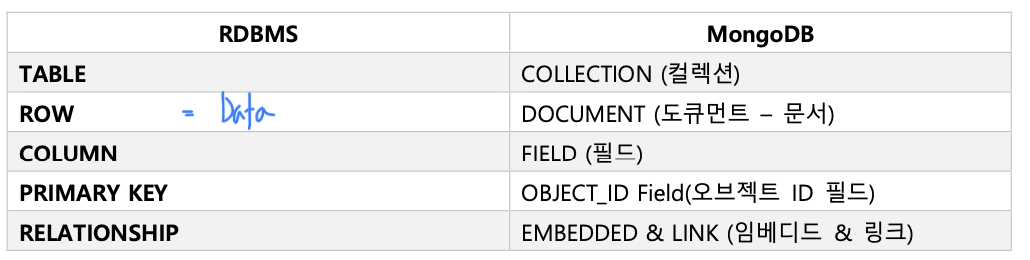

### 예시
```python
use test # 데이터베이스 생성 

db.createCollection("employees", {capped : true, size:10000}) # 컬렉션 생성

show collection # 현재 데이터베이스의 컬렉션 확인하기

db.employees.stats() # 컬렉션의 상태 및 정보 분석

db.employees.renameCollection("emp") # 컬렉션의 이름 바꾸기

db.emp.drop() # 컬렉션 삭제하기
```

## 데이터 삽입과 조회 (INSERT & FIND)

```python
m = { ename : "smith" }  # 데이터 준비하기 ( ename이 smith인 데이터 )
n = { empno : 1101 } # 데이터 준비하기( empno가 1101인 데이터 )

db.things.save(m) # things 컬렉션에 m 변수에 있는 데이터를 저장하기
db.things.save(n) # things 컬렉션에 n 변수에 있는 데이터를 저장하기

db.things.find() # things 컬렉션에 있는 모든 데이터를 조회하기

db.things.insert({empno:1102, ename:"king"})  # 데이터 삽입

it # 데이터를 게속 이어서 확인하기 위해 it를 입력 하세요
```

## 데이터의 수정(UPDATE & SAVE)
UPDATE : 데이터의 일부 수정을 위해 일반적으로 많이 사용됨
SAVE : 하나의 Documnet에서 특정 필드만 변경하더라도 Document 전체를 변경한다.

```python
db.things.update({n:1103}, { $set : { ename : "standford", dept : "research" }})
```
첫 번째 문서인 {n:1103}은 `조건 문서`
- 조건 문서 :  데이터를 수정 하기 위해 수정 조건을 나타낸 문서를 일컫는 말

두 번째 문서 { $set : { ename : “standford”, dept : “research }}는 실제 바꿀 데이터에 대한 내용이 들어가 있는 문서

## 데이터의 삭제
```python
db.things.remove( { m : "test" } ) # m 필드가 test인 문서를 모두 삭제
db.things.find().pretty() # pretty()를 이용하면 문서가 좀더 이쁘게 나옵니다.
```

In [ ]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 29.4 MB/s eta 0:00:00


In [ ]:
!pip install geohash2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=2d317b36e7643ea5358a72853bbd6045358a6a4e9a9267a9f6dbd38afbb2a34b
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [ ]:
# import geohash2
# import requests
# import pandas as pd

# # 함수로 만들기    
# def oneroom(addr):
    
#     # 1. 동이름으로 위도 경도 구하기
#     url = "https://apis.zigbang.com/search?q={}".format(addr)
#     response = requests.get(url)
#     lat, lng = response.json()["items"][0]["lat"], response.json()["items"][0]["lng"]
    
#     # 2. 위도 경도로 geohash 알아내기
#     geohash = geohash2.encode(lat, lng, precision=5) 
    
#     # 3. geohash로 매물 리스트 가져오기
#     url = "https://apis.zigbang.com/v2/items?\
# deposit_gteq=0&domain=zigbang&geohash={}&rent_gteq=0&sales_type_in=전세|월세&service_type_eq=빌라".format(geohash)
#     response = requests.get(url)
#     items = response.json()["items"]
#     ids = [item["item_id"] for item in items]
    
#     # 4. id로 매물 정보 가져오기
#     url = "https://apis.zigbang.com/v2/items/list"
#     params = {
#         "domain": "zigbang",
#         "withCoalition": "false",
#         "item_ids": ids[:900],
#     }

#     response = requests.post(url, params)
#     items = response.json()["items"]
#     return [item for item in items if addr in item["address"]]

In [ ]:
oneroom("동작구")

KeyError: ignored

In [ ]:
import requests
import csv
import json
import uuid
import inspect
import re
import os
uuid = str(uuid.uuid4())
item_list_api = "https://apis.zigbang.com/v2/items"
describe_list_api = item_list_api + '/list'
item_describe_api = "https://apis.zigbang.com/v3/items?item_ids={item_id}&detail=true"
item_view_url = "https://zigbang.com/home/oneroom/items/{item_id}"
referer = "https://zigbang.com/home/oneroom/subways/414/items"
headers = {
    'Host':'apis.zigbang.com',
    'Connection':'keep-alive',
    'Pragma':'no-cache',
    'Cache-Control':'no-cache',
    'Accept':'application/json, text/plain, */*',
    'Origin':'https://zigbang.com',
    'User-Agent':'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Mobile Safari/537.36',
    'DNT':'1',
    'Sec-Fetch-Site':'same-site',
    'Sec-Fetch-Mode':'cors',
    'Referer':'https://zigbang.com/home/oneroom/subways/414/items',
    'Referer': 'https://www.zigbang.com/home/oneroom/map',
    'Accept-Encoding':'gzip, deflate, br',
    'Accept-Language':'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
}
class magic_fstring_function:
    def __init__(self, payload):
        self.payload = payload
        self.cached = None
    def __str__(self):
        if self.cached is None:
            vars = inspect.currentframe().f_back.f_globals.copy()
            vars.update(inspect.currentframe().f_back.f_locals)
            self.cached = self.payload.format(**vars)
        return self.cached
def export_items(items):
    fieldnames = [
        'id',
        'service_type',
        'address1',
        'address2',
        '_floor',
        'size',
        'size_m2',
        'sales_type',
        'rent',
        'deposit',
        'manage_cost',
        'manage_cost_inc',
        'elevator',
        'room_direction_text',
        'images',
        'parking',
        'near_subways',
        'options',
        'description',
        'title'
    ]
    filtered_item = []
    for item in items:
        item = item['item']
        item_id = item['id']
        url = magic_fstring_function(item_view_url)
        item['url'] = str(url)
        new_item = {}
        for fieldname in fieldnames:
            new_item[fieldname] = item[fieldname]
        filtered_item.append(new_item)
    return filtered_item
def describe_room_list(items):
    item_ids = list(items.keys())
    max_idx = int(len(item_ids) / 30)
    if len(item_ids) % 30 != 0:
        max_idx += 1
    items = []
    headers['Accept'] = 'application/json'
    headers['Referer'] = 'https://www.zigbang.com/home/oneroom/map'
    for i in range(max_idx):
        start_idx = i * 30
        end_idx = min((i+1)*30, len(item_ids))
        sub_ids = item_ids[start_idx:end_idx-1]
        item_id = str(sub_ids).replace(' ', '').replace('\'','')
        api = magic_fstring_function(item_describe_api)
        resp = requests.get(
            url=str(api),
            headers=headers,
            timeout=5,
        )
        resp.encoding = 'utf-8'
        result = resp.json()
        resp.close()
        items += result['items']
    return items
def get_room_list(
    items,
    deposit_gteq: int = 0,
    deposit_lteq: int = 8000,
    domain: str = "zigbang",
    floor_in: str = "ground",
    geohash: str = "wydjr",
    rent_gteq: int = 0,
    sales_type_in: str = "월세",
    service_type_eq: str = "원룸",
    ):
    resp = requests.get(
        url=item_list_api,
        params={
            "deposit_gteq": deposit_gteq,
            "deposit_lteq": deposit_lteq,
            "domain": domain,
            "floor_in": floor_in,
            "geohash": geohash,
            "rent_gteq": rent_gteq,
            "sales_type_in": sales_type_in,
            "service_type_eq": service_type_eq,
        },
        headers=headers,
        timeout=5,
    )
    new_items = json.loads(resp.content.decode('utf-8'))
    resp.close()
    for section in new_items['sections']:
        for item in section['item_ids']:
            items[str(item)] = {}
    return items
def get_full_address(item):
    addr = item['address1']
    addr += ' '
    addr += item['address2'] or ''
    addr += ' '
    addr += item['_floor'] or ''
    addr += ' '
    addr += item['title'] or ''
    return addr
def remove_non_digits(s):
    return re.sub(r'\D', '', s)
def crawl(geo_loc='wydr', apt_type='js'):
    if apt_type == 'ws':
        apt_type_kor = '월세'
    elif apt_type == 'js':
        apt_type_kor = '전세'
    items = {}
    items = get_room_list(items, geohash=geo_loc, sales_type_in=apt_type_kor)
    print(f'Crawling {geo_loc}({apt_type_kor})')
    describe_items = describe_room_list(items)
    define_column = export_items(describe_items)
    print(f'{geo_loc}의 {apt_type_kor} 매물 개수: {len(define_column)}')
    geo_dict = {}
    for item in define_column:
        full_addr = get_full_address(item)
        item['address'] = full_addr
        if full_addr not in geo_dict:
            geo_dict[full_addr] = []
        geo_dict[full_addr].append(item)
    item_list = []
    for apt in geo_dict.keys():
        item_list.append(geo_dict[apt][0])
    csv_name = f'{geo_loc}_{apt_type}.csv'
    with open(csv_name, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = [
            'id',
            'service_type',
            'address1',
            'address2',
            '_floor',
            'size',
            'size_m2',
            'sales_type',
            'rent',
            'deposit',
            'manage_cost',
            'manage_cost_inc',
            'elevator',
            'room_direction_text',
            'images',
            'parking',
            'near_subways',
            'options',
            'description',
            'title'
        ]
        csvfile.write('\ufeff')
        writer = csv.DictWriter(csvfile, extrasaction='ignore', fieldnames=fieldnames)
        writer.writeheader()
        # for item in item_list:
        #   print(item)
        return item_list

In [ ]:
# pymongo 사용하기
import pymongo
client = pymongo.MongoClient("mongodb://13.208.235.178:27017/")
client

MongoClient(host=['13.208.235.178:27017'], document_class=dict, tz_aware=False, connect=True)

In [ ]:
zigbang = client.crawling.zigbang # crawling 데이터베이스 , zigbang 컬렉션 만들기
zigbang

Collection(Database(MongoClient(host=['13.208.235.178:27017'], document_class=dict, tz_aware=False, connect=True), 'crawling'), 'zigbang')

In [ ]:
items= crawl()
items

Crawling wydr(전세)
wydr의 전세 매물 개수: 22


[{'id': 36767029,
  'service_type': '원룸',
  'address1': '경기도 동두천시 지행동',
  'address2': '675-4',
  '_floor': '2층',
  'size': 7,
  'size_m2': 23.14,
  'sales_type': '전세',
  'rent': 0,
  'deposit': 3500,
  'manage_cost': '5만원',
  'manage_cost_inc': '수도,인터넷,TV',
  'elevator': '없음',
  'room_direction_text': '남서향',
  'images': [{'index': 0,
    'count': 1,
    'url': 'https://ic.zigbang.com/ic/items/36767029/1.jpg'},
   {'index': 1,
    'count': 2,
    'url': 'https://ic.zigbang.com/ic/items/36767029/2.jpg'},
   {'index': 2,
    'count': 3,
    'url': 'https://ic.zigbang.com/ic/items/36767029/3.jpg'},
   {'index': 3,
    'count': 4,
    'url': 'https://ic.zigbang.com/ic/items/36767029/4.jpg'},
   {'index': 4,
    'count': 5,
    'url': 'https://ic.zigbang.com/ic/items/36767029/5.jpg'}],
  'parking': '가능',
  'near_subways': '지행역(1호선), 동두천중앙역(1호선)',
  'options': '에어컨,냉장고,세탁기,인덕션,전자레인지,책상,책장,침대,옷장,신발장,싱크대',
  'description': '☝ 위치 및 특징\r\n- 원룸촌에 위치한 조용한 원룸입니다.\r\n- 주방분리형이며  방이 정말 넓고 쾌적해서 거주하시는 동안

In [ ]:
zigbang.insert_many(items)

In [ ]:
pd.DataFrame(items)

,id,service_type,address1,address2,_floor,size,size_m2,sales_type,rent,deposit,...,elevator,room_direction_text,images,parking,near_subways,options,description,title,address,_id
0,36767029,원룸,경기도 동두천시 지행동,675-4,2층,7.0,23.14,전세,0,3500,...,없음,남서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,"지행역(1호선), 동두천중앙역(1호선)","에어컨,냉장고,세탁기,인덕션,전자레인지,책상,책장,침대,옷장,신발장,싱크대",☝ 위치 및 특징\r\n- 원룸촌에 위치한 조용한 원룸입니다.\r\n- 주방분리형이...,😊청소완료😊주방분리형 완전 넓은1.5룸 전세입니다,경기도 동두천시 지행동 675-4 2층 😊청소완료😊주방분리형 완전 넓은1.5룸 전세입니다,6476df4d30c227225accc90a
1,36740738,원룸,경기도 양주시 고암동,597-2,4층,10.6,35.01,전세,0,6000,...,있음,북동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대",넓은 복층구조로 생활하기 편함\r\n주변에 체육공원 및 산책로 있음\r\n\r\n교...,복층구조의 원룸\r\n신축건물로 첫입주임,경기도 양주시 고암동 597-2 4층 복층구조의 원룸\r\n신축건물로 첫입주임,6476df4d30c227225accc90b
2,36497381,원룸,경기도 동두천시 지행동,667-3,3층,8.0,26.45,전세,0,3500,...,없음,남향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,"지행역(1호선), 동두천중앙역(1호선)","에어컨,냉장고,세탁기,인덕션,책상,책장,침대,옷장,신발장,싱크대",동두천에서 대표 원룸전문 부동산 [[ AAA부동산 ]] 입니다. *^ㅇ^* \r\n...,"♥♥ 큰방 월세, 둘이 살아도 넓은원룸, 귀한 전세","경기도 동두천시 지행동 667-3 3층 ♥♥ 큰방 월세, 둘이 살아도 넓은원룸, 귀...",6476df4d30c227225accc90c
3,36775621,원룸,경기도 포천시 소흘읍 송우리,726-10,3층,8.0,26.45,전세,0,5000,...,없음,북서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",불가능,-,"에어컨,냉장고,세탁기,가스레인지,책장,신발장,싱크대",📸100%실사진만 보여드립니다.\r\n\r\n💜 소재지 : 소흘읍 송우리 먹자골목 ...,송우리 3단지 인근 넓고 쾌적한 원룸 전세,경기도 포천시 소흘읍 송우리 726-10 3층 송우리 3단지 인근 넓고 쾌적한 원룸 전세,6476df4d30c227225accc90d
4,36324519,원룸,경기도 포천시 소흘읍 송우리,728-20,1층,8.0,26.45,전세,0,5000,...,없음,남서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,옷장,신발장,싱크대",주차좋은 조용한 원룸입니다 차 있으신 분 권합니다 \r\n\r\n깨끗하고 조용합니...,신축급 넘 깨끗하고 조용한 넓은 분리형 원룸,경기도 포천시 소흘읍 송우리 728-20 1층 신축급 넘 깨끗하고 조용한 넓은 분리...,6476df4d30c227225accc90e
5,36482996,원룸,경기도 양주시 고암동,597-2,2층,7.0,23.14,전세,0,5000,...,있음,남동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대","▶넓고 조용한 원룸\r\n▶1층에 편의점있는 편세권\r\n▶체육공원, 편의점, 세탁...",신축 저렴한 원룸 전세,경기도 양주시 고암동 597-2 2층 신축 저렴한 원룸 전세,6476df4d30c227225accc90f
6,36635436,원룸,경기도 포천시 소흘읍 송우리,728-15,2층,8.0,26.45,전세,0,4500,...,없음,북동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대",넓고 구조 좋으며 주차 생활권 편리한 원룸입니다 주변 운동하기 좋고 편으점1분거리...,넓고 구조 좋은 신축 깨끗한 원룸입니다,경기도 포천시 소흘읍 송우리 728-15 2층 넓고 구조 좋은 신축 깨끗한 원룸입니다,6476df4d30c227225accc910
7,36542722,원룸,경기도 동두천시 지행동,682-5,1층,6.0,19.83,전세,0,4000,...,없음,서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,"지행역(1호선), 동두천중앙역(1호선)","에어컨,냉장고,세탁기,인덕션,전자레인지,책상,침대,옷장,신발장,싱크대",🌈지행동 원룸단지내 입지최상인 곳입니다.\r\n🌈지행역8분이내 거리 이구요.\r\n...,"❤❤❤,깨끗하고 예쁜방❤❤❤","경기도 동두천시 지행동 682-5 1층 ❤❤❤,깨끗하고 예쁜방❤❤❤",6476df4d30c227225accc911
8,36744226,원룸,경기도 양주시 고암동,140-7,3층,7.0,23.14,전세,0,3000,...,없음,북향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,덕정역(1호선),"에어컨,냉장고,세탁기,가스레인지,신발장,싱크대",오픈형 원룸으로 방이 넓고 깨끗합니다.\r\n조용한 집이고 권리 관계 안전합니다.\...,❤️원룸//이사 하시 가능하고 방도 넓어요❤️,경기도 양주시 고암동 140-7 3층 ❤️원룸//이사 하시 가능하고 방도 넓어요❤️,6476df4d30c227225accc912
9,36671087,원룸,경기도 양주시 옥정동,1069-2,3층,6.0,19.83,전세,0,6000,...,있음,북향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,전자레인지,책상,신발장,싱크대",\r\n🌈 탁트인 테라스 \r\n\r\n🌈 요즘 오피스타일! 깔끔 빌트인\r\n\...,🎀깔끔한 빌트인🎀 👍세련된원룸👍,경기도 양주시 옥정동 1069-2 3층 🎀깔끔한 빌트인🎀 👍세련된원룸👍,6476df4d30c227225accc913


In [ ]:
QUERY = {
    "size":{"$gte": 7.0}
}

In [ ]:
result = zigbang.find(QUERY)

In [ ]:
pd.DataFrame(result)

,_id,id,service_type,address1,address2,_floor,size,size_m2,sales_type,rent,...,manage_cost_inc,elevator,room_direction_text,images,parking,near_subways,options,description,title,address
0,6476df4d30c227225accc90a,36767029,원룸,경기도 동두천시 지행동,675-4,2층,7.0,23.14,전세,0,...,"수도,인터넷,TV",없음,남서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,"지행역(1호선), 동두천중앙역(1호선)","에어컨,냉장고,세탁기,인덕션,전자레인지,책상,책장,침대,옷장,신발장,싱크대",☝ 위치 및 특징\r\n- 원룸촌에 위치한 조용한 원룸입니다.\r\n- 주방분리형이...,😊청소완료😊주방분리형 완전 넓은1.5룸 전세입니다,경기도 동두천시 지행동 675-4 2층 😊청소완료😊주방분리형 완전 넓은1.5룸 전세입니다
1,6476df4d30c227225accc90b,36740738,원룸,경기도 양주시 고암동,597-2,4층,10.6,35.01,전세,0,...,"인터넷,TV",있음,북동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대",넓은 복층구조로 생활하기 편함\r\n주변에 체육공원 및 산책로 있음\r\n\r\n교...,복층구조의 원룸\r\n신축건물로 첫입주임,경기도 양주시 고암동 597-2 4층 복층구조의 원룸\r\n신축건물로 첫입주임
2,6476df4d30c227225accc90c,36497381,원룸,경기도 동두천시 지행동,667-3,3층,8.0,26.45,전세,0,...,"수도,인터넷,TV",없음,남향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,"지행역(1호선), 동두천중앙역(1호선)","에어컨,냉장고,세탁기,인덕션,책상,책장,침대,옷장,신발장,싱크대",동두천에서 대표 원룸전문 부동산 [[ AAA부동산 ]] 입니다. *^ㅇ^* \r\n...,"♥♥ 큰방 월세, 둘이 살아도 넓은원룸, 귀한 전세","경기도 동두천시 지행동 667-3 3층 ♥♥ 큰방 월세, 둘이 살아도 넓은원룸, 귀..."
3,6476df4d30c227225accc90d,36775621,원룸,경기도 포천시 소흘읍 송우리,726-10,3층,8.0,26.45,전세,0,...,-,없음,북서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",불가능,-,"에어컨,냉장고,세탁기,가스레인지,책장,신발장,싱크대",📸100%실사진만 보여드립니다.\r\n\r\n💜 소재지 : 소흘읍 송우리 먹자골목 ...,송우리 3단지 인근 넓고 쾌적한 원룸 전세,경기도 포천시 소흘읍 송우리 726-10 3층 송우리 3단지 인근 넓고 쾌적한 원룸 전세
4,6476df4d30c227225accc90e,36324519,원룸,경기도 포천시 소흘읍 송우리,728-20,1층,8.0,26.45,전세,0,...,"수도,인터넷,TV",없음,남서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,옷장,신발장,싱크대",주차좋은 조용한 원룸입니다 차 있으신 분 권합니다 \r\n\r\n깨끗하고 조용합니...,신축급 넘 깨끗하고 조용한 넓은 분리형 원룸,경기도 포천시 소흘읍 송우리 728-20 1층 신축급 넘 깨끗하고 조용한 넓은 분리...
5,6476df4d30c227225accc90f,36482996,원룸,경기도 양주시 고암동,597-2,2층,7.0,23.14,전세,0,...,"인터넷,TV",있음,남동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대","▶넓고 조용한 원룸\r\n▶1층에 편의점있는 편세권\r\n▶체육공원, 편의점, 세탁...",신축 저렴한 원룸 전세,경기도 양주시 고암동 597-2 2층 신축 저렴한 원룸 전세
6,6476df4d30c227225accc910,36635436,원룸,경기도 포천시 소흘읍 송우리,728-15,2층,8.0,26.45,전세,0,...,"수도,인터넷,TV",없음,북동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,신발장,싱크대",넓고 구조 좋으며 주차 생활권 편리한 원룸입니다 주변 운동하기 좋고 편으점1분거리...,넓고 구조 좋은 신축 깨끗한 원룸입니다,경기도 포천시 소흘읍 송우리 728-15 2층 넓고 구조 좋은 신축 깨끗한 원룸입니다
7,6476df4d30c227225accc912,36744226,원룸,경기도 양주시 고암동,140-7,3층,7.0,23.14,전세,0,...,수도,없음,북향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,덕정역(1호선),"에어컨,냉장고,세탁기,가스레인지,신발장,싱크대",오픈형 원룸으로 방이 넓고 깨끗합니다.\r\n조용한 집이고 권리 관계 안전합니다.\...,❤️원룸//이사 하시 가능하고 방도 넓어요❤️,경기도 양주시 고암동 140-7 3층 ❤️원룸//이사 하시 가능하고 방도 넓어요❤️
8,6476df4d30c227225accc915,36644103,원룸,경기도 동두천시 송내동,680-4,3층,10.0,33.06,전세,0,...,"수도,인터넷,TV",없음,서향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",불가능,지행역(1호선),"에어컨,냉장고,세탁기,인덕션,전자레인지,책상,책장,침대,옷장,신발장,싱크대",♡♡방구조♡♡\n- 롯데마트 앞쪽 위치!!\n- 모던스타일로 한번보면 살고 싶어지는...,🌟🌟모던스타일의 원룸!! 전세ok~!!!,경기도 동두천시 송내동 680-4 3층 🌟🌟모던스타일의 원룸!! 전세ok~!!!
9,6476df4d30c227225accc917,36775423,원룸,경기도 양주시 옥정동,1078-2,2층,7.0,23.14,전세,0,...,"수도,인터넷,TV",있음,동향,"[{'index': 0, 'count': 1, 'url': 'https://ic.z...",가능,-,"에어컨,냉장고,세탁기,인덕션,전자레인지,옷장,신발장,싱크대",🎀 매물 정보 🎀\r\n\r\n🎁 깔끔한 풀옵션 원룸\r\n\r\n🎁 막힘없어 개...,🟥깔끔한 풀옵션 원룸 월세🟨,경기도 양주시 옥정동 1078-2 2층 🟥깔끔한 풀옵션 원룸 월세🟨
